# Objective
* Describe when linear regression is the appropriate analysis technique
* Use scikit-learn to perform Linear Regression and Multiple Linear Regression

***

# 1. Linear Regression
[Linear Regression](https://towardsdatascience.com/simple-linear-regression-in-four-lines-of-code-d690fe4dba84) is a supervised analytical technique used on continuous data (both features and targets) to predict a dependent variable. 

**Q1.1** [Try it out here!](https://www.desmos.com/calculator/jwquvmikhr) I recommend adding another data point (x,y) and see how the equation (slope and intercept) for the line changes. If you add a point below the line, do you expect the slope of the line to decrease or increase? What about above the line? It looks like linear regression is trying to find the best fit line between all of our points!

## Simple Linear Regression (one independent variable) Pseudocode
Before we get into the explanation of Linear Regression, let's cover our variables and what they represent:
* Feature: $x$
* Target: $y$
* Intercept: $\beta_{0}$
* Slope: $\beta_{1}$

The pseudocode for linear regression isn't very exciting because we can simply calculate the slope and intercept. We will then use the slope and intercept to create the equation for a line: $y$ = $\beta_{0}$ + $\beta_{1}$ * $x$

<span style= "font-size:2em;">**Slope:** $\beta_{1}$ = $\frac{\sum_{i} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i} (x_{i} - \bar{x})^2}$

If we rearrange the equation for a line, we can calculate the intercept:

<span style= "font-size:2em;">**Intercept:** $\beta_{0}$ = $\bar{y}$ - $\beta_{1}$ * $\bar{x}$

The first part of this exercise will walk through the seven Machine Learning Steps to use simple linear regression to predict GPA based on SAT scores.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# regression module
from sklearn.linear_model import LinearRegression

## 1.1 & 1.2 Gather and Prepare the Data

Read the data from `linear_regression.csv` and save it to the variable `data`. Inspect the first five lines of the DataFrame `data`.

In [2]:
# We start by loading the data
data = pd.read_csv('linear_regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## 1.3 Choose a Model

The single feature (`SAT`) is **continuous** and we have a target (`GPA`), which is also **continuous**, so our best model is a Simple Linear Regression model.

## 1.4 Train the Model
In this step our goal is to find the slope and intercept for the equation of a line that best fits our data. This equation looks like:

<span style= "font-size:1.5em;">GPA = $\beta_{0}$ + $\beta_{1}$ * SAT

### Declare the independent and dependent variables

In [3]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single dependent variable: 'GPA'
y = data['GPA']

In [4]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [5]:
y.shape

(84,)

Scikit-Learn is expecting a 2D array (a matrix) for the features (x), so we need to reshape the 1D array into a 2D array. Both of the lines of code below work the same because (just like list indexing) the 84th index is the same as -1st index.

In [6]:
x_matrix = x.values.reshape(84,1)
# x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Implement Regression
Here is the [Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), in case you would like to look more into what is going on. Start similarly to kmeans clustering by creating an abstract LinearRegression object and assign it to the variable `reg`. Then fit the model using the independent and dependent variables, `x_matrix` and `y`, respectively.

In [7]:
# create a linear regression object
reg = LinearRegression()

In [8]:
# fit the regression
reg.fit(x_matrix,y)

LinearRegression()

## 1.5 Evaluate the Model

### R-squared
One of the simplest and best ways to find the "goodness" or "fit" (how close our data fit the regression line) of a Linear Regression model is to find the R-squared value. There is not a good value for R-sqared... For some human behavior psychology models, a low R-squared value (< 0.5) might be amazing! Additionally there might be some models with extremely high R-squared values (> 0.95) that are actually poorly fit models. This may seem counterintuitive, but just know that there is an **art** to the **science** of Machine Learning.

In [9]:
# find R-squared with score method
reg.score(x_matrix,y)

0.40600391479679765

## 1.6 Tuning
The R-squared value is a good indicator of whether or not we need to tune our model, but unfortunately there isn't a whole lot we can *tune* for a simple Linear Regression model. One thing we might consider to tune a Linear Regression model is adding another feature. That is called Multiple Linear Regression and we will do that below!

## 1.7 Making Predictions

### Coefficients
**Note:** the output is an array, as we may have several coefficients (that would be Multiple Linear Regression).

In [10]:
# get coefficient
reg.coef_

array([0.00165569])

### Intercept
**Note:** the result is a float as we expect a single value.

In [11]:
# get intercept
reg.intercept_

0.2750402996602803

Before we make any predictions using new data, let's stop to understand what the coefficient and intercept are actually telling us. Remember, linear regression creates a line $y$ = $\beta_{0}$ + $\beta_{1}$ * $x$ (`GPA = intercept +  coef * SAT`). So, if a student had a zero on the SAT, we can predict their GPA by using the same equation. `GPA = 0.275 + 0.0017 * 0`, which is a GPA of 0.275. **For every SAT point a student earns, we predict their GPA to rise 0.0017 points.**

We can use the `predict` method to predict new GPA values based on provided SAT scores. **Note:** the result is an array, as we can predict more than one value at a time depending on how many values we input.

In [12]:
# predict GPA for 1740 SAT score
reg.predict([[1740]])

array([3.15593751])

In [13]:
# create a DataFrame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [14]:
# predict GPA for SAT scores in DataFrame
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
# store the predictions in a new series in the same DataFrame
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


## Plot Regression Line Using Model

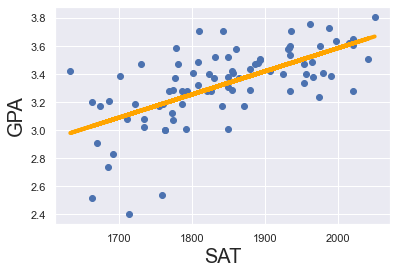

In [17]:
# plot the data
plt.scatter(x,y)

# using the parameters from the model to create the regression line (y = b0 + b1*x)
yhat = reg.coef_ * x_matrix + reg.intercept_

# plotting regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label='regression line')

# labelling axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Looking at the scatter plot above, we can see that our predicted linear equation (orange line) fits the data (blue dots) pretty well! **Fun insight to scikit-learn's magic: This line was created by trying a bunch of different lines and minimizing the distance from the line to all the points.**

## Plot Regression Line Using Seaborn
We can easily use Seaborn to plot the regression line too!

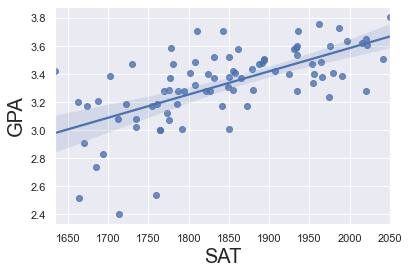

In [18]:
# Plot the data
sns.regplot(x = x,y = y)

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# 2. Multiple Linear Regression
Multiple Linear Regression is **very** similar to Simple Linear Regression, the only difference is that we are now using multiple features to predict our target. During Simple Linear Regression we tried to find a line that fit our 2D scatter plot the best. Now, with Multiple Linear Regression, we will be creating the same model in multi-dimension space. The plot below is using the features `TV` and `Radio` to predict sales. Notice the model is creating the best fit plane (3D) instead of a line (2D).

![multiplereg](multiple.png)

Unfortunately, we can only visualize this in 2 and 3 dimensions, so we won't be able to plot when we have more than two features. 

## 2.1 & 2.2 Gather and Prepare the Data

Read the data from `multiple_linear_regression.csv` and save it to the variable `data`. Inspect the first five lines of the DataFrame `data`.

In [19]:
# We start by loading the data
data = pd.read_csv('multiple_linear_regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,ACT,GPA
0,1714,31,2.40
1,1664,35,2.52
2,1760,32,2.54
3,1685,32,2.74
4,1693,34,2.83


In [20]:
data.describe()

,SAT,ACT,GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,28.559524,3.330238
std,104.530661,4.917025,0.271617
min,1634.000000,20.000000,2.400000
25%,1772.000000,24.750000,3.190000
50%,1846.000000,29.500000,3.380000
75%,1934.000000,32.250000,3.502500
max,2050.000000,36.000000,3.810000


## 2.3 Choose a Model

Both features (`SAT` and `ACT`) are **continuous** and we have a target (`GPA`), which is also **continuous**, so we can either use a Simple Linear Regression model with one of our features or we can use a Multiple Linear Regression model which uses multiple features. Let's try out a Multiple Linear Regression model to see if adding in the `ACT` feature improves the fit of our model!

## 2.4 Train the Model
In this step our goal is to find the slope and intercept for the equation of a line that best fits our data. This equation looks like:

<span style= "font-size:1.5em;">GPA = $\beta_{0}$ + $\beta_{1}$ * SAT + $\beta_{2}$ * ACT

In [21]:
# There are now 2 independent variables: 'SAT' and 'ACT'
x = data[['SAT', 'ACT']]

# and a single depended variable: 'GPA'
y = data['GPA']

In [22]:
# We start the same by creating a linear regression object
reg = LinearRegression()

# Fit the regression
reg.fit(x,y)

LinearRegression()

## 2.5 Evaluate the Model

In [23]:
# r-squared
reg.score(x,y)

0.40625074991651655

## 2.6 Tuning
One of the best ways to tune a Multiple Linear Regression model is adding and removes features. It doesn't appear that adding the variable helped us too much, so I would consider removing this variable.

## 2.7 Making Predictions

In [24]:
# get the coefficients
reg.coef_

array([0.00166351, 0.00088366])

In [25]:
# get the intercept
reg.intercept_

0.23536939985790672

In [26]:
# predict GPA for SAT = 1740, ACT = 32
reg.predict([[1740, 32]])

array([3.15815427])

In [27]:
# create a DataFrame with several different values of SAT and ACT
new_data = pd.DataFrame(data=[[1740, 32],[1760, 35]],columns=['SAT', 'ACT'])
new_data

,SAT,ACT
0,1740,32
1,1760,35


In [28]:
# predict GPA from new_data
reg.predict(new_data)

array([3.15815427, 3.19407547])

In [29]:
# store the predictions in a new series in the same DataFrame
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,ACT,Predicted_GPA
0,1740,32,3.158154
1,1760,35,3.194075


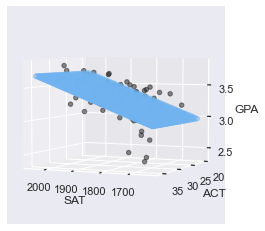

In [30]:
# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = data['SAT']
x2 = data['ACT']
y = data['GPA']

ax.set_xlabel("SAT")
ax.set_ylabel("ACT")
ax.set_zlabel("GPA")

ax.scatter(x1, x2, y, color='k', zorder=15, marker='o', alpha=0.5)

# Using the parameters from the model to create the regression plane (y = b0 + b1x1 + b2x2)
yhat = reg.intercept_ + reg.coef_[0] * x1 + reg.coef_[1] * x2

# create ranges of SAT and ACT values to predict (corners of the plane)
x1_pred = np.linspace(min(x1), max(x1), 50)   # range of porosity values
x2_pred = np.linspace(min(x2), max(x2), 50)  # range of brittleness values
xx1_pred, xx2_pred = np.meshgrid(x1_pred, x2_pred)
model_viz = np.array([xx1_pred.flatten(), xx2_pred.flatten()]).T

# predict GPA based on the plane of SAT and ACT values
predicted = reg.predict(model_viz)

# draw the plane
ax.scatter(xx1_pred.flatten(), xx2_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

# change the view angle of the plot
ax.view_init(elev=4, azim=114)

plt.show()

<AxesSubplot:xlabel='ACT', ylabel='GPA'>

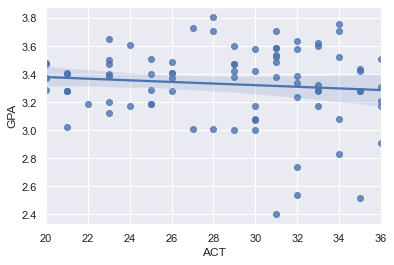

In [35]:
sns.regplot(data=data, x = 'ACT', y='GPA')

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

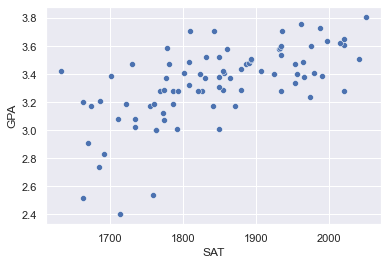

In [33]:
sns.scatterplot(data=data, x = 'SAT', y='GPA')